# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [2]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [3]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=BALRODJJ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

C:\Users\juanj\AppData\Local\Temp\ipykernel_13204\164933949.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


### - Explicar linea por linea la query utilizada arriba

In [4]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

### - Aproximar a dos decimales el monto_promedio

### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [5]:
# info

### - Muestre los tipos de datos de cada columna:

In [6]:
sales_data.dtypes

fecha                 object
ventas               float64
cantidad               int64
transacciones          int64
monto_promedio       float64
cantidad_promedio      int64
variedad               int64
clientes               int64
vendedores             int64
dtype: object

### - Dimensiones del dataframe (shape)

In [7]:
sales_data.shape

(38, 9)

### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [8]:
sales_data.describe()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
count,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.702553e+07,7234.578947,828.026316,147862.879674,11.342105,101.631579,808.842105,11.236842
std,6.051102e+07,5601.450467,796.913149,124012.409608,7.826760,51.404817,769.105536,5.074761
min,1.461499e+05,141.000000,43.000000,155.644100,1.000000,21.000000,43.000000,1.000000
25%,2.606614e+07,2974.000000,287.000000,49202.019475,5.250000,58.250000,287.000000,10.000000
50%,7.756321e+07,5609.000000,384.000000,111793.302500,9.500000,99.500000,384.000000,12.500000
75%,1.215372e+08,10851.750000,1752.000000,259254.022025,17.750000,145.000000,1703.500000,15.750000
max,2.150542e+08,22582.000000,2411.000000,432681.923300,28.000000,196.000000,2350.000000,17.000000


### - Aproxime los resultados anteriores a dos decimales aquellas columnas que lo requieran

### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [9]:
sales_data.columns

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

### - Muestre el contenido de las primeras 15 líneas del dataframe

In [10]:
sales_data.head(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Muestre las últimas cinco líneas del dataframe

### Calcular el cambio procentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

### - Calcular el promedio de ventas de por trimestre y por año.

## Procesamiento de los datos: Cálculo de la correlación entre las variables

### - Seleccionar solo columnas numéricas del dataframe:

In [11]:
numeric_sales_data = sales_data.select_dtypes(include=[float, int])

### - Imprima la nueva dataset con las columnas numéricas

In [12]:
numeric_sales_data.head()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,8.094970e+06,825,43,188255.1210,19,47,43,9
1,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,5.547916e+05,157,157,3533.7045,1,22,157,1


### - Calcular la correlación, imprima la matriz de correlación.

In [13]:
correlation = numeric_sales_data.corr()
correlation

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
ventas,1.000000,0.905770,0.340578,0.518040,0.560443,0.786085,0.343143,0.756155
cantidad,0.905770,1.000000,0.695079,0.150793,0.220271,0.911487,0.696895,0.741270
transacciones,0.340578,0.695079,1.000000,-0.471896,-0.419235,0.691916,0.999950,0.344915
monto_promedio,0.518040,0.150793,-0.471896,1.000000,0.980627,0.135919,-0.469092,0.351248
cantidad_promedio,0.560443,0.220271,-0.419235,0.980627,1.000000,0.227174,-0.416486,0.421830
variedad,0.786085,0.911487,0.691916,0.135919,0.227174,1.000000,0.693319,0.749922
clientes,0.343143,0.696895,0.999950,-0.469092,-0.416486,0.693319,1.000000,0.346082
vendedores,0.756155,0.741270,0.344915,0.351248,0.421830,0.749922,0.346082,1.000000


### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

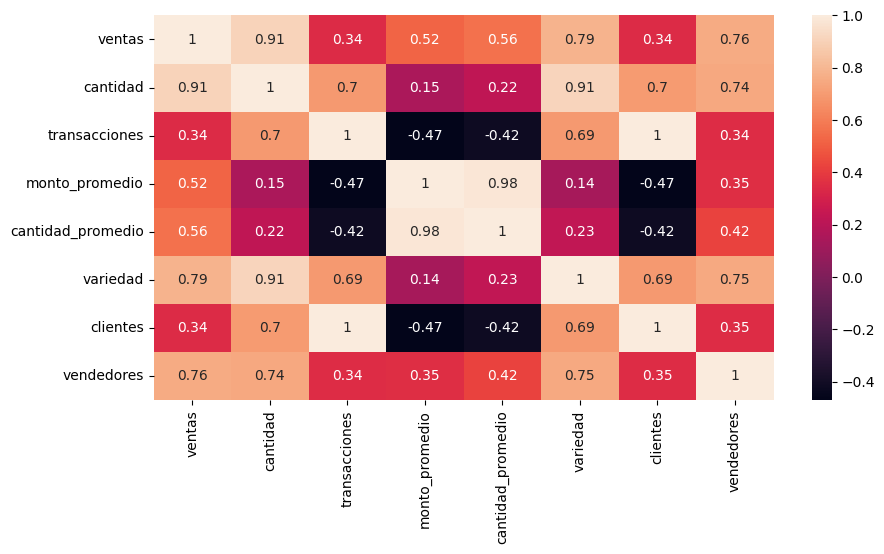

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_sales_data[correlation.index].corr(), annot=True)
plt.show()

### - Describa y explique la salida (la matriz de correlación) anterior

### Selección de las variables más correlacionadas con las ventas

In [15]:
correlation = correlation["ventas"].sort_values(ascending=False)

### Explicar el código dado arriba

### - Visualización gráfica de las variables correlacionadas

### - Explicar linea por línea el siguiente código:

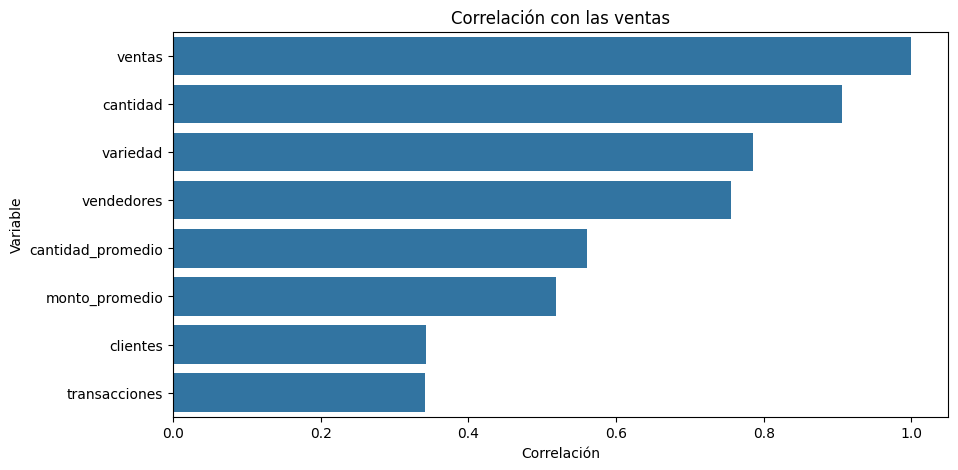

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlación con las ventas")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

### - Interpretar el plot de arriba

### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

### - Visualización gráfica de las variables correlacionadas con monto_promedio

### Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

### - Explicar línea por línea el siguiente código:

In [17]:
influencers = []
for variable in correlation.index:
    p_value, corr = stats.pearsonr(numeric_sales_data["ventas"], numeric_sales_data[variable])
    if p_value <= 0.05:
        influencers.append((variable, corr))
    elif p_value > 0.05:
        influencers.append((variable, corr, "No significativo"))

### - Utlizar código de arriba pero tomando como referencia la varible monto_promedio

### Impresión de los resultados

### - Explicar línea por línea el siguiente código:  

In [18]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers:
    if len(influencers) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")

Variables influyentes en las ventas:
ventas: correlación = 0.00 (No significativo)
cantidad: correlación = 0.00 (No significativo)
variedad: correlación = 0.00 (No significativo)
vendedores: correlación = 0.00 (No significativo)
cantidad_promedio: correlación = 0.00 (No significativo)
monto_promedio: correlación = 0.00 (No significativo)
clientes: correlación = 0.03 (No significativo)
transacciones: correlación = 0.04 (No significativo)


Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

### - Rehacer el código de arriba pero usando monto_promedio

## Conclusiones

Ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa. En otras palabras, el análisis indica que no hay una relación clara entre las variables y las ventas de la empresa. 

Es importante tener en cuenta que la falta de correlación no necesariamente significa que las variables no son importantes para el negocio, ya que pueden haber otros factores que afecten las ventas que no se están considerando en este análisis. 

Por lo tanto, es necesario realizar más análisis y considerar otros factores para comprender mejor las tendencias de las ventas de la empresa.

## Recomendaciones

A partir de los resultados y las conclusiones de que ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa, se pueden dar las siguientes recomendaciones:

* *Ampliar el análisis*: Es importante considerar que el análisis realizado solo incluyó un conjunto limitado de variables y no consideró otros factores importantes que podrían estar influyendo en las ventas de la empresa. Se recomienda realizar un análisis más amplio e incluir otras variables relevantes que puedan tener un impacto en las ventas, como la satisfacción del cliente, la calidad de los productos, la competencia en el mercado, entre otros.

* *Realizar encuestas a los clientes*: Realizar encuestas a los clientes puede ser una buena manera de obtener información sobre los factores que los motivan a comprar y los aspectos que consideran importantes al momento de realizar una compra. Esta información puede ayudar a la empresa a identificar áreas de oportunidad y mejorar su estrategia de ventas.

* *Realizar análisis de la competencia*: Analizar a la competencia puede ser útil para entender mejor el mercado y conocer las tendencias del mismo. Además, puede ayudar a la empresa a identificar estrategias exitosas de la competencia que puedan ser aplicables a su negocio.

* *Implementar estrategias de marketing*: Aunque las variables analizadas no mostraron una correlación significativa con las ventas, implementar estrategias de marketing puede ser útil para incrementar la exposición de la empresa y atraer a nuevos clientes. Las estrategias de marketing pueden incluir publicidad en línea, redes sociales, promociones y descuentos, entre otros.